In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
nap = pd.read_csv("NAP_audience_performance.csv")

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
nap = nap.drop(nap.index[nap["Audience List Type"].isnull()])

In [9]:
nap.columns

Index(['Audience List', 'Audience List ID', 'Audience List Type',
       'Audience List Cost (USD)', 'Advertiser Currency', 'Impressions',
       'Clicks', 'Total Conversions', 'Revenue (Adv Currency)'],
      dtype='object')

In [10]:
nap = nap.drop(['Audience List ID', 'Audience List Type',
       'Audience List Cost (USD)', 'Advertiser Currency'], axis=1)

In [11]:
nap.columns

Index(['Audience List', 'Impressions', 'Clicks', 'Total Conversions',
       'Revenue (Adv Currency)'],
      dtype='object')

In [12]:
nap.columns = ['Audience', 'Impressions', 'Clicks', 'Conversions',
       'Spend']

In [13]:
nap["CTR"] = nap.Clicks / nap.Impressions
nap["CPA"] = nap.Spend / nap.Conversions

In [25]:
nap.CPA = nap.CPA.replace(np.inf, 0)

In [14]:
napBMDemoAge = nap[(nap.Audience.str.contains("bid manager", case=False)) & 
                   (nap.Audience.str.contains("Demographics » Age", case=False))]

In [15]:
napBMDemoGender = nap[(nap.Audience.str.contains("bid manager", case=False)) & 
                      (nap.Audience.str.contains("Demographics » gender", case=False))]

In [39]:
napVDNAEducation = nap[nap.Audience.str.contains("VisualDNA » Demographics » Education", case=False)]

In [16]:
napBMDemoGender[["Audience", "CPA"]]

,Audience,CPA
8633,Bid Manager Audiences » Demographics » Gender ...,0.000000
8634,Bid Manager Audiences » Demographics » Gender ...,13.300616
16055,Bid Manager Audiences » Demographics » Gender ...,8.110585


In [17]:
np.unique(napBMDemoGender.Audience)

array(['Bid Manager Audiences » Demographics » Gender » Female',
       'Bid Manager Audiences » Demographics » Gender » Male',
       'Bid Manager Audiences » Demographics » Gender » Unknown'], dtype=object)

In [18]:
napBMDemoAge.Audience = napBMDemoAge.Audience.astype("category")
napBMDemoGender.Audience = napBMDemoGender.Audience.astype("category")

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


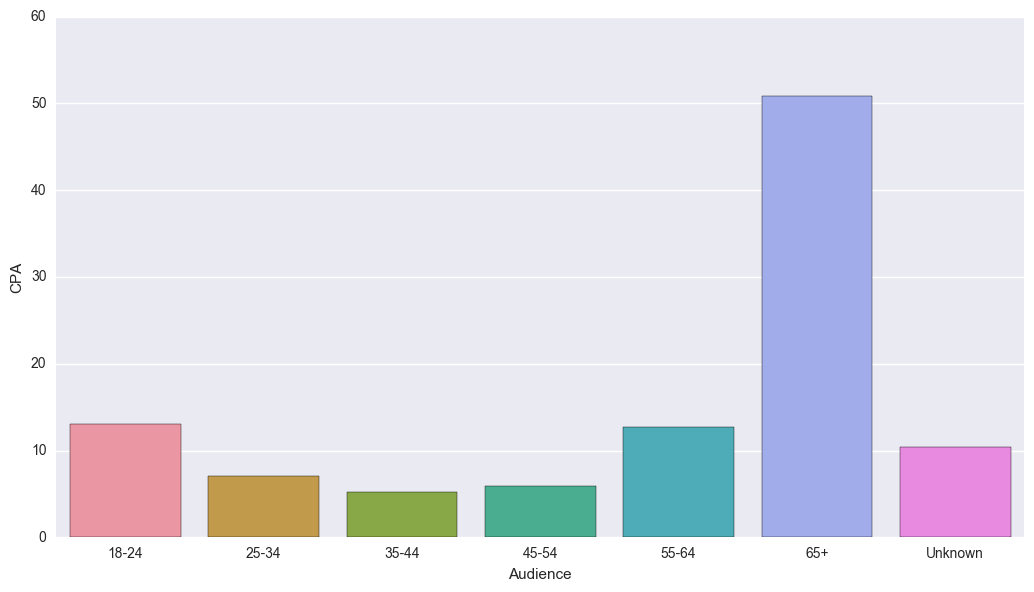

In [40]:
ageplot = sns.factorplot(data=napBMDemoAge, x="Audience", y="CPA", kind="bar",
                      order=['Bid Manager Audiences » Demographics » Age » 18 to 24',
       'Bid Manager Audiences » Demographics » Age » 25 to 34',
       'Bid Manager Audiences » Demographics » Age » 35 to 44',
       'Bid Manager Audiences » Demographics » Age » 45 to 54',
       'Bid Manager Audiences » Demographics » Age » 55 to 64',
       'Bid Manager Audiences » Demographics » Age » 65 plus',
       'Bid Manager Audiences » Demographics » Age » Unknown'], size=6, aspect=2)
ageplot = ageplot.set(xticklabels=["18-24", "25-34", "35-44", "45-54", "55-64", "65+", "Unknown"])

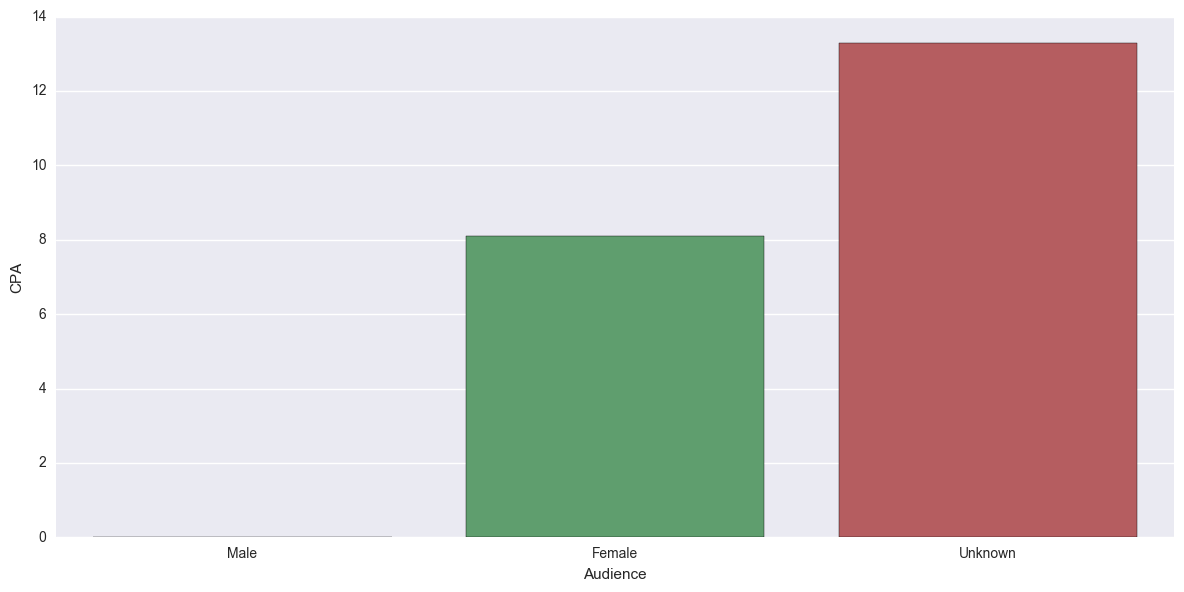

In [41]:
genderplot = sns.factorplot(data=napBMDemoGender, x="Audience", y="CPA", kind="bar",
                      order=['Bid Manager Audiences » Demographics » Gender » Male', 
                             'Bid Manager Audiences » Demographics » Gender » Female',
                             'Bid Manager Audiences » Demographics » Gender » Unknown'], size=6, aspect=2)
genderplot = genderplot.set(xticklabels=["Male", "Female", "Unknown"])

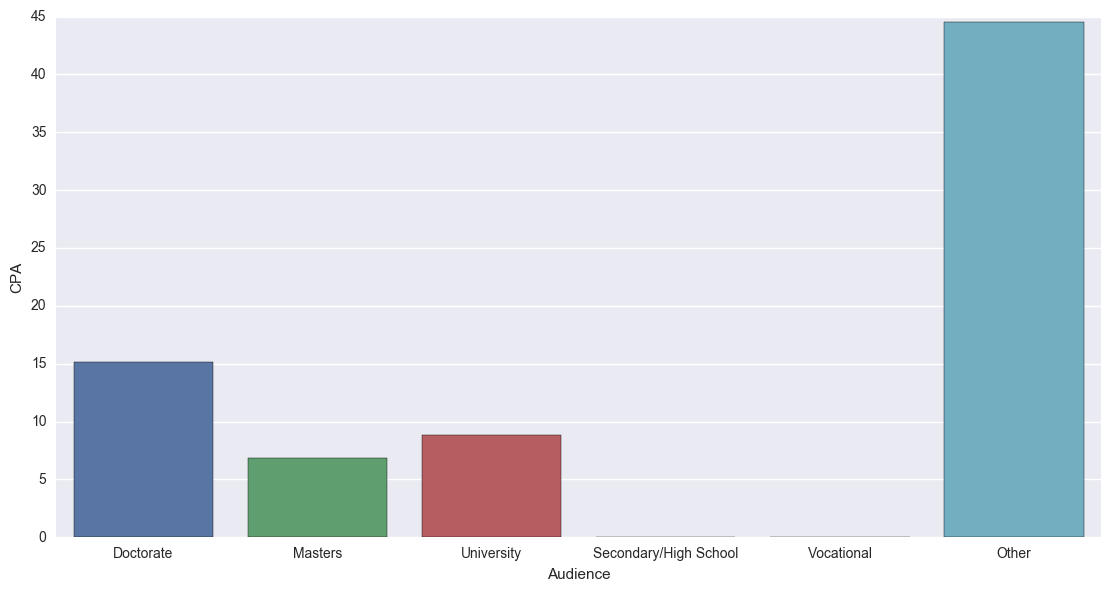

In [62]:
eduplot = sns.factorplot(data=napVDNAEducation, x="Audience", y="CPA", kind="bar", 
                            order=['VisualDNA » Demographics » Education » Doctorate',
       'VisualDNA » Demographics » Education » Masters',
       'VisualDNA » Demographics » Education » University',
       'VisualDNA » Demographics » Education » Secondary/High School',
       'VisualDNA » Demographics » Education » Vocational',
       'VisualDNA » Demographics » Education » Other'],
                         size=6, aspect=2)
eduplot = eduplot.set_xticklabels(['Doctorate','Masters', 'University', 'Secondary/High School', 'Vocational', 'Other'])

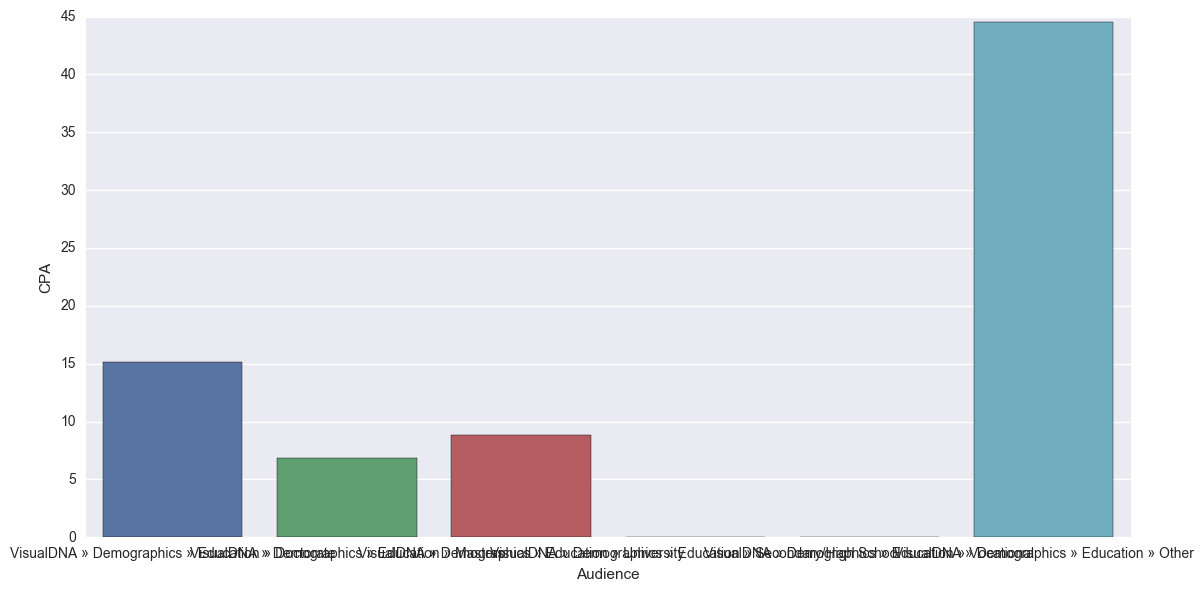

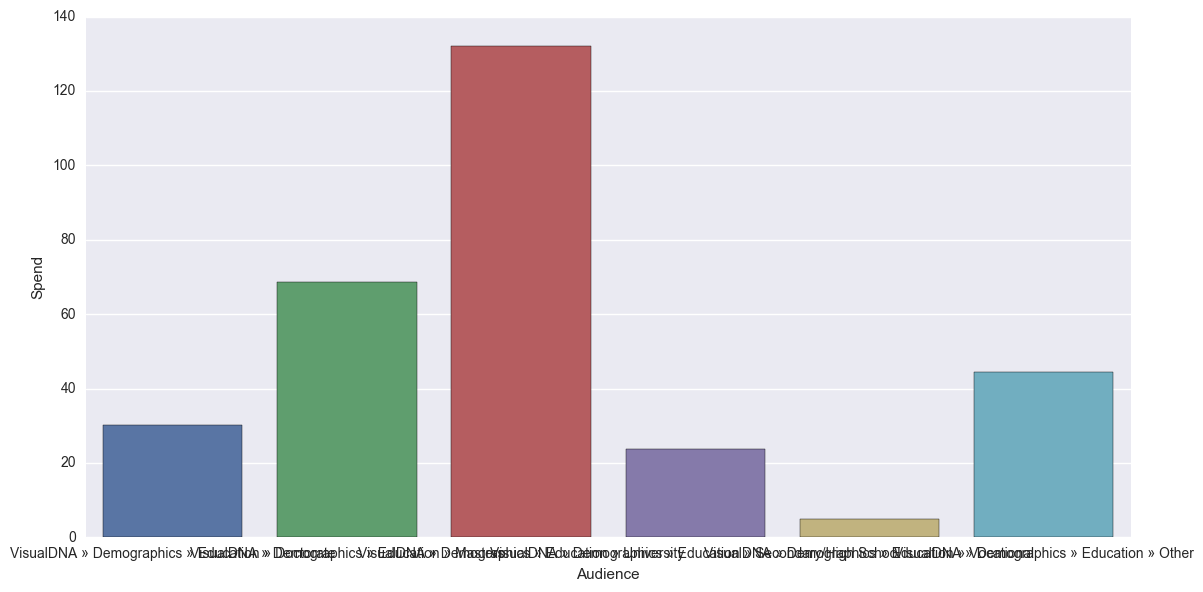

In [63]:
sns.factorplot(data=napVDNAEducation, x="Audience", y="CPA", kind="bar", 
                            order=['VisualDNA » Demographics » Education » Doctorate',
       'VisualDNA » Demographics » Education » Masters',
       'VisualDNA » Demographics » Education » University',
       'VisualDNA » Demographics » Education » Secondary/High School',
       'VisualDNA » Demographics » Education » Vocational',
       'VisualDNA » Demographics » Education » Other'],
                         size=6, aspect=2)
sns.factorplot(data=napVDNAEducation, x="Audience", y="Spend", kind="bar", 
                            order=['VisualDNA » Demographics » Education » Doctorate',
       'VisualDNA » Demographics » Education » Masters',
       'VisualDNA » Demographics » Education » University',
       'VisualDNA » Demographics » Education » Secondary/High School',
       'VisualDNA » Demographics » Education » Vocational',
       'VisualDNA » Demographics » Education » Other'],
                         size=6, aspect=2)

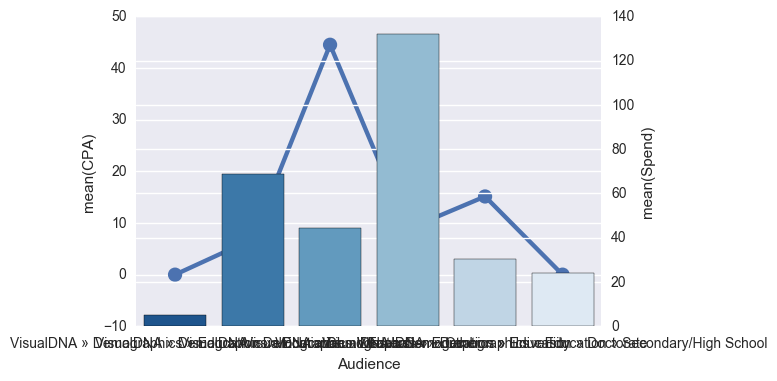

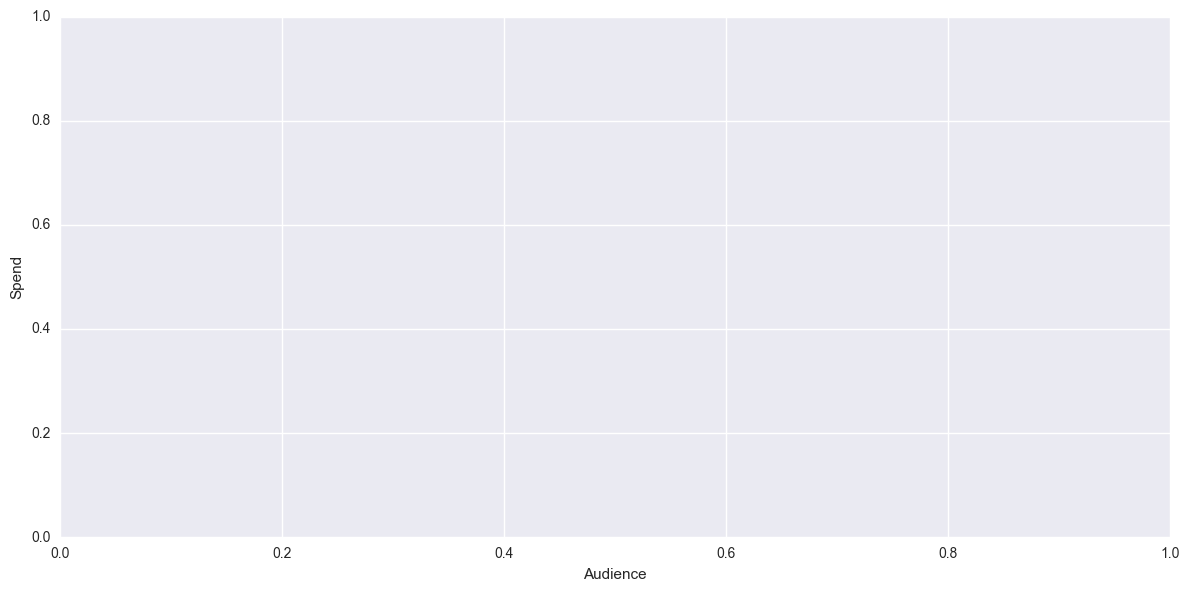

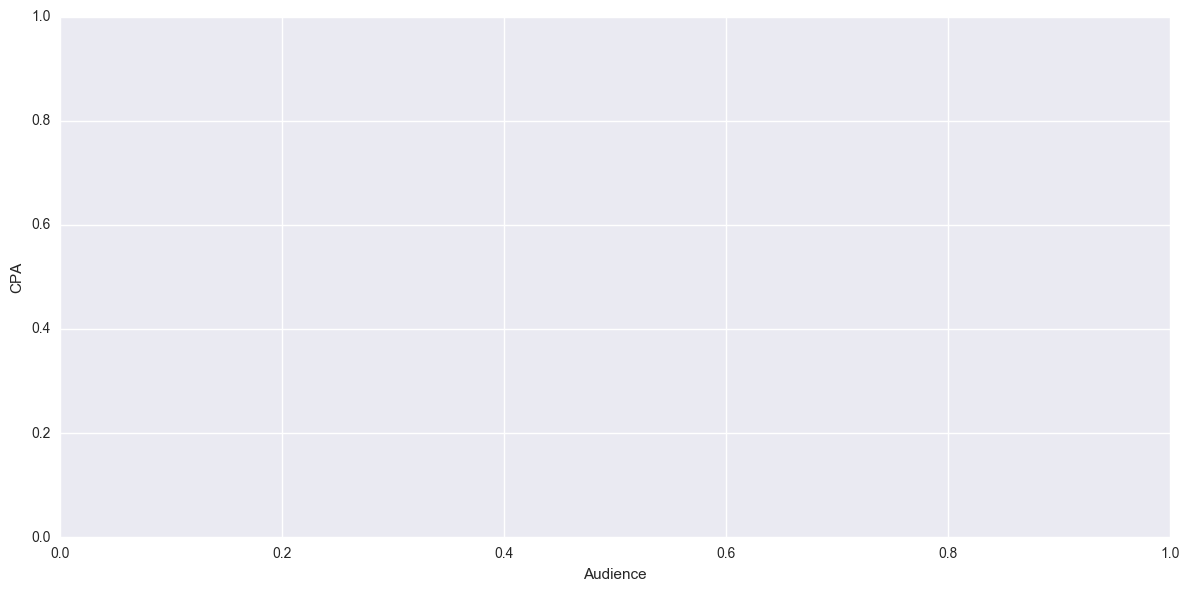

In [87]:
pal = sns.color_palette("Blues_r")
fig, ax = plt.subplots()
ax2 = ax.twinx()
sns.factorplot(data=napVDNAEducation, x="Audience", y="Spend", kind="bar", size=6, aspect=2, ax=ax2, palette=pal)
sns.factorplot(data=napVDNAEducation, x="Audience", y="CPA", size=6, aspect=2, ax=ax)